In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Ingest Files for Full Year Data

#full_17 = pd.read_csv('cb_2017.csv', index_col=[0], parse_dates=[0])
#full_17[['tripduration', 'age']].describe().round(2)

#full_18 = pd.read_csv('cb_2018.csv', index_col=[0], parse_dates=[0])
#full_18[['tripduration', 'age']].describe().round(2)

#full_19 = pd.read_csv('cb_2019.csv', index_col=[0], parse_dates=[0])
#full_19[['tripduration', 'age']].describe().round(2)

#ytd_20 = pd.read_csv('cb_2020.csv', index_col=[0], parse_dates=[0])
#ytd_20[['tripduration', 'age']].describe().round(2)

In [28]:
# Graphing Age Distribution for Each Year

#ages_17 = full_17['age']
#ages_18 = full_18['age']
#ages_19 = full_19['age']
#ages_20 = ytd_20['age']

#Final Age Dist Graph
#plt.hist(ages_20, bins=(25), range=(15, 85))
#plt.xlabel('2020 Rider Age')
#plt.show()

In [27]:
# Graphing User Type Distribution for Each Year

#ut_17 = full_17['usertype'].value_counts()
#ut_18 = full_18['usertype'].value_counts()
#ut_19 = full_19['usertype'].value_counts()
#ut_20 = ytd_20['usertype'].value_counts()

#Final User Type Dist
#plt.pie(ut_20, labels=('Subscribers', 'Customers'))
#plt.xlabel('2020 User Breakdown')
#plt.show()
#ut_20

In [24]:
# Graphing Gender Distribution for Each Year

#gends_17 = full_17['gender'].value_counts()
#gends_18 = full_18['gender'].value_counts()
#gends_19 = full_19['gender'].value_counts()
#gends_20 = ytd_20['gender'].value_counts()

#fig, ax = plt.subplots()
#ax.hist(gends_20, bins=3)
#ax.set_ylim(auto=True)
#ax.set_xticks([0, 1, 2])
#ax.set_xticklabels(['Unk','Male', 'Female'])
#ax.set_xlabel('2020 Gender Breakdown')
#plt.show()

In [182]:
# Manually Constructing a DataFrame for Monthly Data

l1=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 
l2=[726676, 791647, 727665, 1315404, 1523268, 1731594, 1735599, 1816498, 1878098, 1897592, 1330649, 889967]
l3=[718994, 843114, 976672, 1307543, 1824710, 1953103, 1913625, 1977177, 1877884, 1878657, 1260355, 1016505]
l4=[967287, 943744, 1327960, 1766094, 1924563, 2125370, 2181064, 2344224, 2444900, 2092573, 1478708, 955210]
l5=[1240596, 1146830, 1068457, 682762, 1487890, 1882273, 2105808, 2329514, 2488225, 'NaN', 'NaN', 'NaN']
data = pd.DataFrame(list(zip(l1, l2, l3, l4, l5)))
data.columns = ['Month', '2017', '2018', '2019', '2020']
data = data.set_index('Month')

In [268]:
# Checking Dataframe for Accuracy
#data.head(12).round(2)

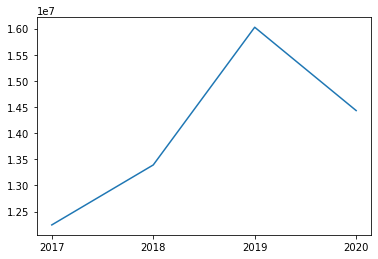

In [265]:
# Checking/Comparing YTD Numbers

x = data[['2017', '2018', '2019', '2020']].iloc[0:9].sum()
plt.plot(x)
plt.show()

In [187]:
# Inserting Mean and STD for Previous Years

#data['Mean'] = data.iloc[:,0:2].mean(numeric_only=True, axis=1)

jan_std = data.iloc[0, 0:2].std()
feb_std = data.iloc[1, 0:2].std()
mar_std = data.iloc[2, 0:2].std()
apr_std = data.iloc[3, 0:2].std()
may_std = data.iloc[4, 0:2].std()
jun_std = data.iloc[5, 0:2].std()
jul_std = data.iloc[6, 0:2].std()
aug_std = data.iloc[7, 0:2].std()
sep_std = data.iloc[8, 0:2].std()
oct_std = data.iloc[9, 0:2].std()
nov_std = data.iloc[10, 0:2].std()
dec_std = data.iloc[11, 0:2].std()
stdv = [jan_std, feb_std, mar_std, apr_std, may_std, jun_std, 
        jul_std, aug_std, sep_std, oct_std, nov_std, dec_std]
data['STD'] = stdv


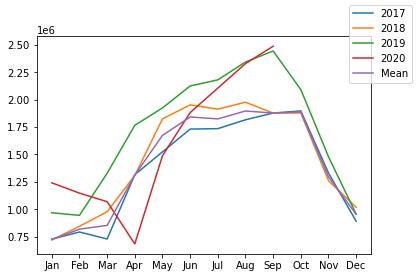

In [185]:
# Plotting Monthly Rides with the Mean
#plt.plot(data)
#plt.figlegend(
#    ('2017', '2018', '2019', '2020', 'Mean'),
#    loc='upper right')
#plt.show()

In [229]:
# Hypothesis Testing
hy_tst = pd.DataFrame(zip(l1, data['2020'], data['Mean'], data['STD']))
hy_tst.columns = ['Month', '2020', 'Mean', 'STD']
hy_tst = hy_tst.set_index('Month')
hy_tst['UB'] = (hy_tst['Mean']) + hy_tst['STD']
hy_tst['LB'] = (hy_tst['Mean']) - hy_tst['STD']

In [264]:
hy_tst.head(12).round(2)

,2020,Mean,STD,UB,LB
Month,,,,,
Jan,1240596,722835.0,5431.99,728266.99,717403.01
Feb,1146830,817380.5,36392.66,853773.16,780987.84
Mar,1068457,852168.5,176074.54,1028243.04,676093.96
Apr,682762,1311473.5,5558.57,1317032.07,1305914.93
May,1487890,1673989.0,213151.68,1887140.68,1460837.32
Jun,1882273,1842348.5,156630.52,1998979.02,1685717.98
Jul,2105808,1824612.0,125883.39,1950495.39,1698728.61
Aug,2329514,1896837.5,113617.21,2010454.71,1783220.29
Sep,2488225,1877991.0,151.32,1878142.32,1877839.68


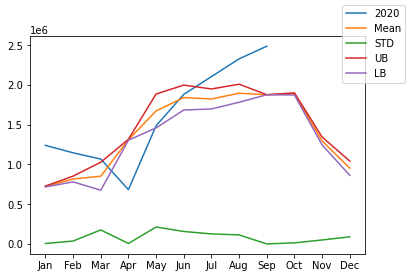

In [231]:
plt.plot(hy_tst)
plt.figlegend(
    ('2020', 'Mean', 'STD', 'UB', 'LB'),
    loc='upper right')
plt.show()